In [1]:
using DrWatson
quickactivate(@__DIR__)

using StatsBase
using Plots
using DataFrames
using CSV

In [2]:
destab_res = DrWatson.collect_results(
        datadir("windsurfers-interactions-sims"),
        rinclude=[r"DesKarG[.]*"]
        #   black_list = bl,
    )
first(destab_res, 10)

┌ Info: Scanning folder /home/pgorski/Desktop/programming/curheider/PolarizationFramework/data/windsurfers-interactions-sims for result files.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:115
┌ Info: Added 1000 entries.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:191


,ode_fun_name,LP,LP_std,zmax,pos_links_changed_std,BR_std
,String?,Float64?,Float64?,Int64?,Float64?,Float64?
1,Heider92!,0.32573,1.11582e-16,100,0.0,0.0
2,Heider92!,0.751569,0.038248,100,6.8959,0.000424087
3,Heider92!,0.744936,0.0487187,100,7.92681,0.000371953
4,Heider92!,0.744088,0.0544484,100,9.01422,0.000525164
5,Heider92!,0.752755,0.0439237,100,8.20997,0.000482207
6,Heider92!,0.749261,0.0484008,100,8.22425,0.000363961
7,Heider92!,0.749699,0.049232,100,8.44086,0.000995173
8,Heider92!,0.751624,0.0395442,100,7.86119,0.000797702
9,Heider92!,0.32573,1.11582e-16,100,0.0,0.0


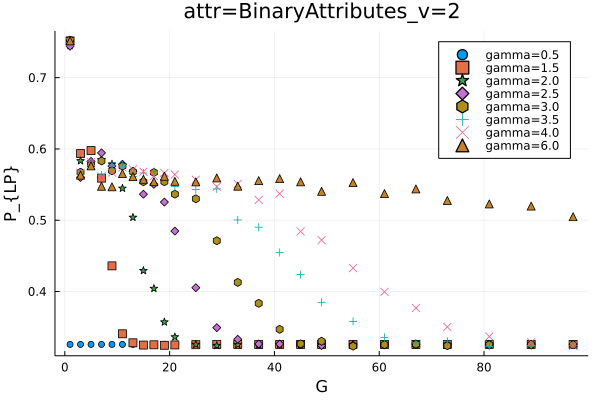

In [3]:
# N = 9
attr_name = "BinaryAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 2 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

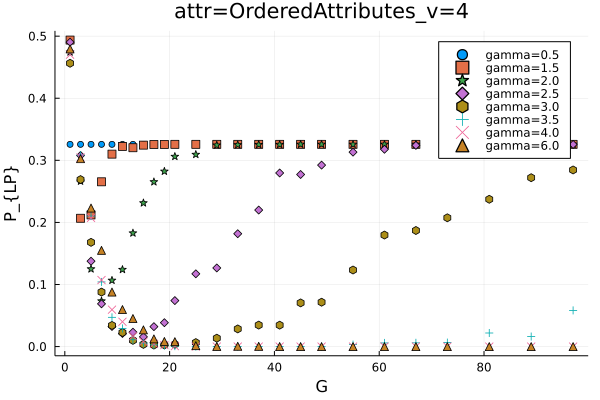

In [4]:
# N = 9
attr_name = "OrderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

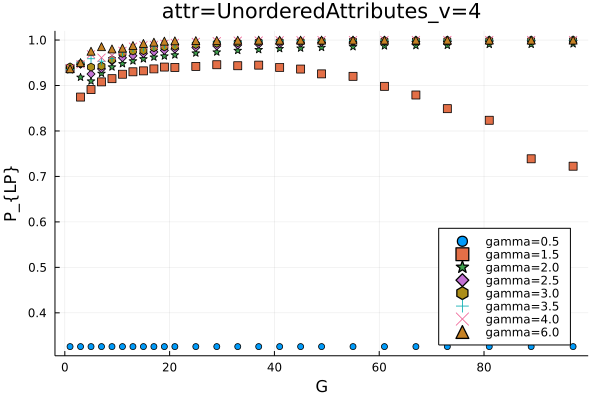

In [5]:
# N = 9
attr_name = "UnorderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{LP}", legend = :bottomright)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

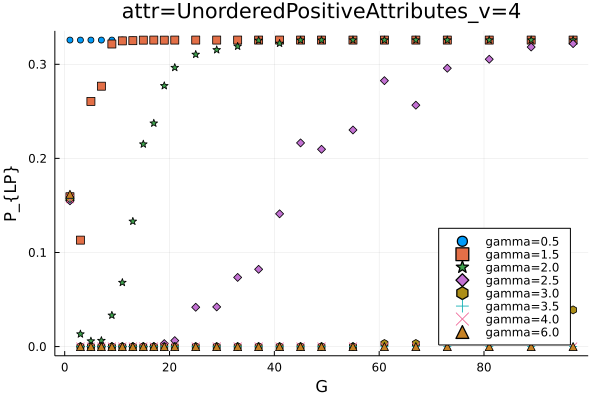

In [6]:
# N = 9
attr_name = "UnorderedPositiveAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{LP}", legend = :bottomright)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

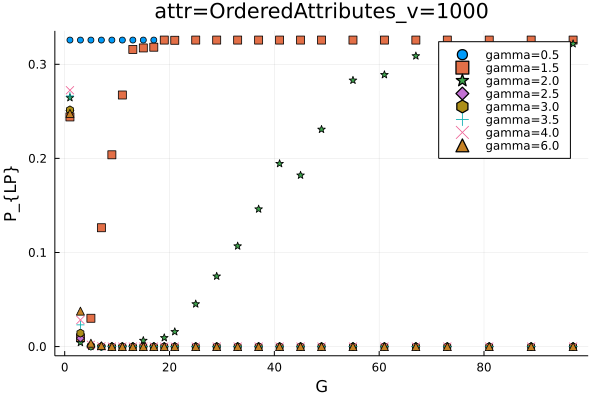

In [7]:
# N = 9
attr_name = "OrderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 1000 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

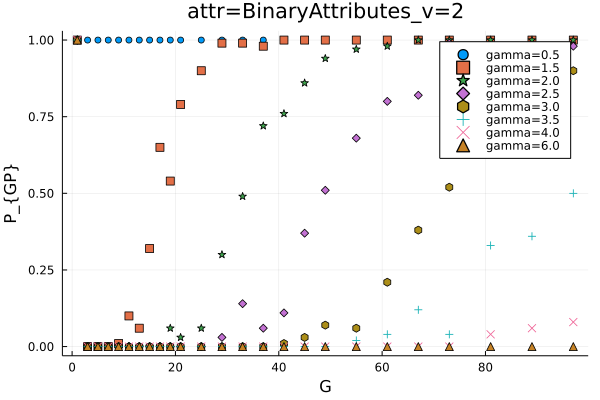

In [8]:
# N = 9
attr_name = "BinaryAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 2 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.GP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{GP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

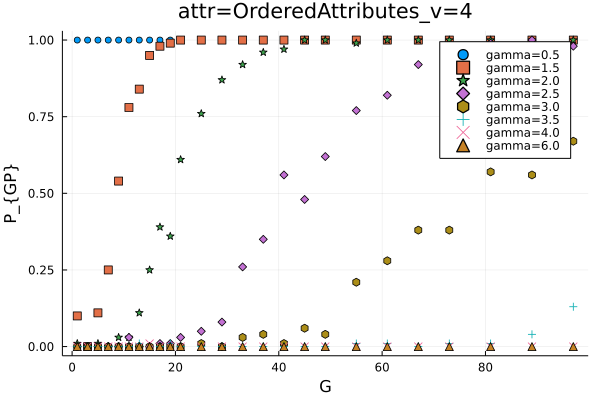

In [9]:
# N = 9
attr_name = "OrderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.GP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{GP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

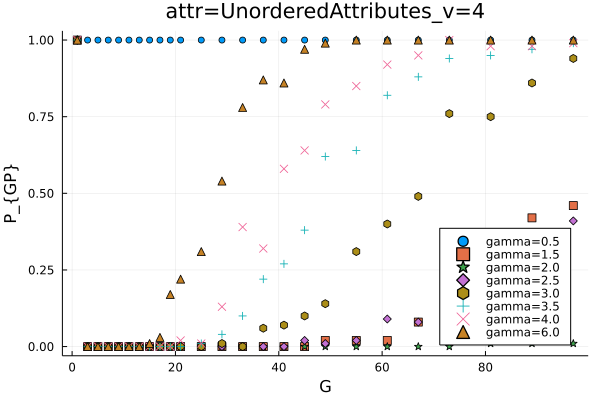

In [10]:
# N = 9
attr_name = "UnorderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.GP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{GP}", legend = :bottomright)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

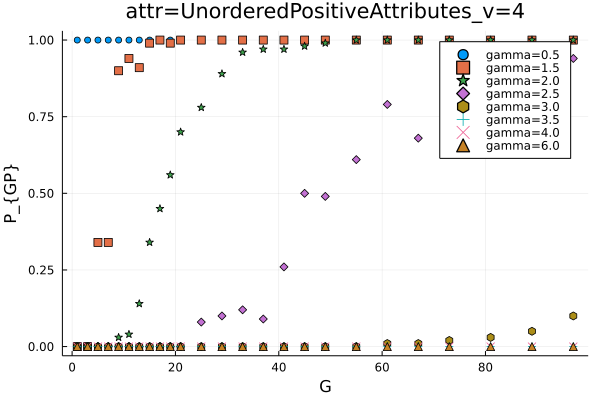

In [11]:
# N = 9
attr_name = "UnorderedPositiveAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.GP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{GP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

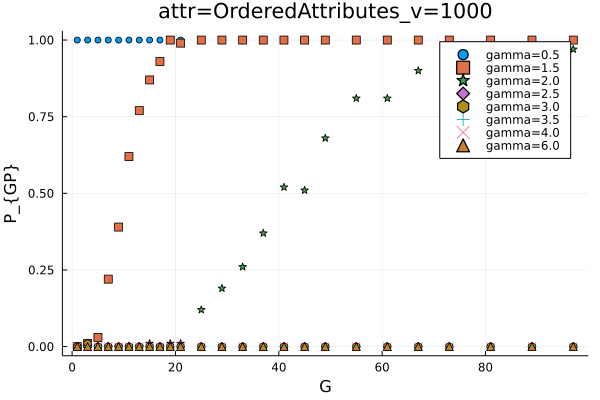

In [12]:
# N = 9
attr_name = "OrderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(destab_res.gamma)
attr_degeneracy = 1000 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict attr_name gamma attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(destab_res)[1])

    for param in dict
        inds .*= destab_res[!, string(param[1])] .== param[2]
    end

    plot!(p, destab_res.G[inds], destab_res.GP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{GP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))